# 状態空間モデル(モデル編)

## 状態空間の準備: 確率分布

### 正規分布

正規分布は自然界で最もよく出てくる分布と言っても過言ではありません。人間の身長、体重、テストの点数、同じ製品の重さなど、色々なものが正規分布にしたがっています。  
正規分布は下図のような形を取ります。平均から離れると急激に確率が低下するのが特徴です。例えば人間の身長を考えても、170cm台は多くの人がいますが、200cm以上となると割合は極わずかです。

また、中心極限定理により、何かの値の平均値は、十分サンプルを集めれば、正規分布に従います。例えば年収は正規分布ではなく指数分布にしたがいますが、例えば各市町村ごとの平均年収のデータを収集すると、平均年収は正規分布にしたがいます。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from scipy.stats import norm # 正規分布の確率分布を作成するのに用いる
import matplotlib.pyplot as plt

x = np.linspace(140,210,101) # 140から210まで、計101個の要素を等間隔にもつリスト(numpy.array)を作成
plt.grid(True)
plt.plot(x, norm.pdf(x, loc=172, scale=5.6), "o") # norm.pdf(x, loc=平均, scale=標準偏差)

# ちなみに、plotの終わりに;を入れると、[<matplotlib.lines.Line2D at ~~~>]のような出力が消せる

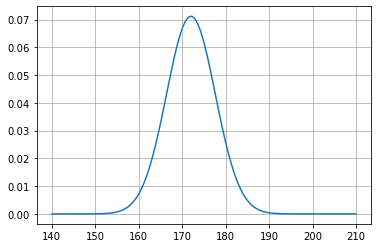

In [2]:
from scipy.stats import norm
import numpy as np

x = np.linspace(140,210,101) 
plt.grid(True)
plt.plot(x, norm.pdf(x, loc=172, scale=5.6))


Q.正規分布のパラメータをあげてみましょう。

A.正規分布のパラメータは2つ。平均と標準偏差である。逆にいうと、平均と標準偏差さえ分かれば、正規分布の形は1つに決まる。

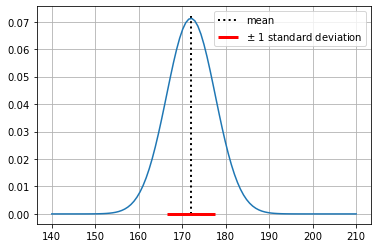

In [3]:
x = np.linspace(140,210,101) 
plt.grid(True)
plt.plot(x, norm.pdf(x, loc=172, scale=5.6))
plt.vlines(172, 0.00, 0.072, linewidth=2, linestyle=":",label="mean")
plt.hlines(0, 172-5.6, 172+5.6, linewidth=3, color="red", label="$\pm$ 1 standard deviation")
plt.legend();

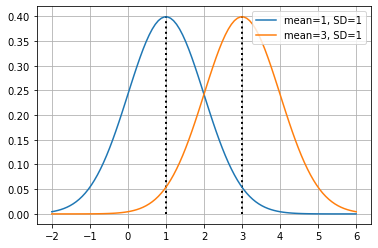

In [4]:
x = np.linspace(-2,6,101) # -2から6まで、計101個の要素を等間隔にもつリスト(numpy.array)を作成
plt.grid(True)
for mu in [1,3]:
    plt.plot(x, norm.pdf(x, loc=mu, scale=1), label=f"mean={mu}, SD=1")
    plt.vlines(mu, -0.00, 0.40, linewidth=2, linestyle=":")
    plt.legend()

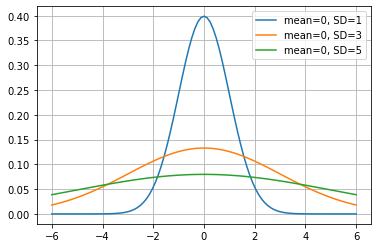

In [5]:
x = np.linspace(-6,6,101) 
plt.grid(True)
for sigma in [1,3,5]:
    plt.plot(x, norm.pdf(x, loc=0, scale=sigma), label=f"mean=0, SD={sigma}")
    plt.legend()

確率密度関数は、全ての値(-$\infty$から$\infty$まで)を足し合わせると1になるという制約があるので、分散が大きい緑の正規分布は、頂点の値も0.07前後と小さくなっています。

平均3, 標準偏差2の正規分布に従う乱数は、以下のようにして生成できます。

In [6]:
norm.rvs(loc=3, scale=2)

3.4946967630069166

In [7]:
# 一気にたくさん作る場合
norm.rvs(loc=3, scale=2, size=10)

array([ 3.66457301,  3.84044657,  4.01223246,  3.13050069, -0.49882971,
        3.73436888,  8.69442401,  1.13650324,  6.37163478,  2.45333267])

平均$\mu$, 標準偏差$\sigma$の正規分布を、以下のような記号で書くことがあります。将来、機械学習や統計系の論文を読む時に備えて、覚えておきましょう。

$$N(\mu, \sigma^2)$$

また、変数$y$が平均$\mu$, 標準偏差$\sigma$の正規分布に従うことを、以下のように書きます。

$$y \sim N(\mu, \sigma^2)$$

ちなみに、平均$\mu$, 標準偏差$\sigma$の正規分布は数式で書くと以下のような形です。

$$\frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

### ポアソン分布

カウントデータ(件数)の分布によく用いられます。例えば故障の件数や、交通事故の死亡件数などです。特に発生確率が低いものの件数がポアソン分布でモデリングされることが多いです。

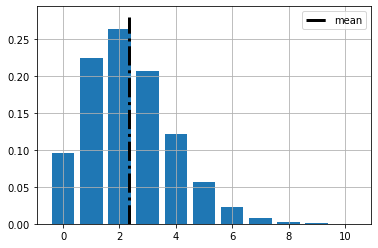

In [8]:
from scipy.stats import poisson # ポアソン分布の確率分布を作成するのに用いる

x = np.linspace(0,10,11) # 0から10まで、計11個の要素を等間隔にもつリスト(numpy.array)を作成
plt.grid(True)
plt.bar(x, poisson.pmf(x, mu=2.35)) # poisson.pdf(x, mu=平均値)
plt.vlines(2.35, 0, 0.28, linewidth=3, linestyle="-.", label="mean")
plt.legend()

特徴としては、カウントデータなので、常に0以上であること、整数であることです。

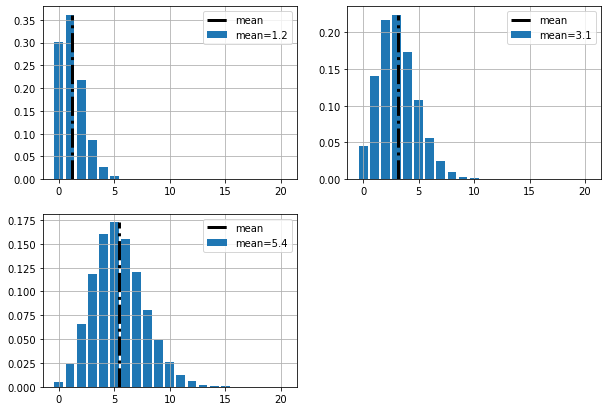

In [9]:
x = np.linspace(0,20,21) 
fig = plt.figure(figsize=(10,7))
for i, mu in enumerate([1.2, 3.1, 5.4]):
    ax = fig.add_subplot(2,2,i+1)
    ax.grid(True)
    ax.bar(x, poisson.pmf(x, mu=mu), label=f"mean={mu}")
    v_max = poisson.pmf(x, mu=mu).max()
    ax.vlines(mu, 0, v_max, linewidth=3, linestyle="-.", label="mean")
    ax.legend()

パラメータは1つだけで、平均値のみです。

平均値が大きくなると、標準偏差が$\sqrt{平均}$の正規分布に近づいてきます。

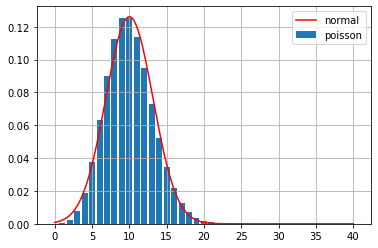

In [10]:
x = np.linspace(0,40,201) 
plt.grid(True)
plt.bar(x, poisson.pmf(x, mu=10), label="poisson") # poisson.pdf(x, mu=平均値)
plt.plot(x, norm.pdf(x, loc=10, scale=np.sqrt(10)), "r", label="normal")
plt.legend()

In [11]:
# ポアソン分布に従う乱数の生成
poisson.rvs(mu=10, size=20) # 平均10、3つ生成

array([ 8, 13,  8, 14,  8, 13, 11, 12,  9,  9, 10,  4,  9, 14,  9, 16,  6,
        8, 16,  6])

また、変数$y$が平均$\lambda$のポアソン分布に従うことを、以下のように書きます。
$$y \sim Poisson(\lambda)$$

ちなみに、平均$\lambda$のポアソン分布を数式で書くと、以下のようになります。ただし$x$は整数です。
$$\frac{\lambda^x e^{-\lambda}}{x!}$$

### 一様分布

シンプルな分布です。ある範囲a~bについて、同じ確率で値が生成されます。
宝くじなどに使うことができます。

また、次回以降で解説するベイズ推定では、分布をデータを使って更新していきますが、その更新前の"もと"としてつかうことが多いです。

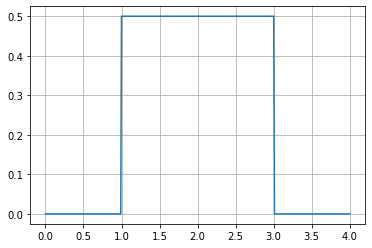

In [12]:
from scipy.stats import uniform # 一様分布の確率分布を作成するのに用いる

x = np.linspace(0,4,401)
plt.grid(True)
plt.plot(x, uniform.pdf(x, loc=1, scale=2)) # poisson.pdf(x, loc=左端の位置, scale=長さ)

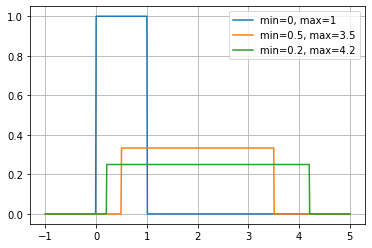

In [13]:
x = np.linspace(-1,5,601) 
plt.grid(True)
plt.plot(x, uniform.pdf(x, loc=0, scale=1), label=f"min=0, max=1")
plt.plot(x, uniform.pdf(x, loc=0.5, scale=3), label=f"min=0.5, max=3.5")
plt.plot(x, uniform.pdf(x, loc=0.2, scale=4), label=f"min=0.2, max=4.2")
plt.legend()

パラメータは2つで、範囲の最小値、範囲の長さ。

In [14]:
# 範囲1~3の一様分布に従う値を3つ生成
uniform.rvs(loc=-1, scale=2, size=10)

array([-0.24317201,  0.96305499,  0.50135383,  0.91844442,  0.61433441,
       -0.34774913, -0.48609264,  0.54896017, -0.46367425, -0.4989397 ])

また、変数$y$が範囲$a \leq y \leq b$の一様分布に従うことを、以下のように書きます。
$$y \sim U(a, b)$$

ちなみに、範囲$a \leq y \leq b$の一様分布を数式で書くと、以下のようになります。
$$\frac{1}{b - a}$$

### ベルヌーイ分布

こちらもシンプルな分布です。確率$p$で1が発生し、確率$1-p$で0が発生します。例えば、コインの表が出るか否か、サイコロで6が出るか否か、ある車両Aが故障するか否か、などです。

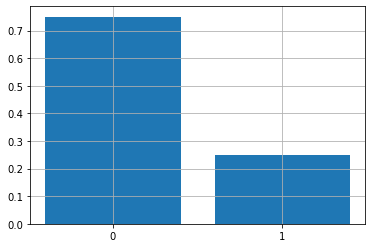

In [15]:
from scipy.stats import bernoulli # ベルヌイ分布の確率分布を作成するのに用いる

x = np.linspace(0,1,2) 
plt.grid(True)
plt.bar(x, bernoulli.pmf(x, p=0.25)) # poisson.pdf(x, mu=平均値)
plt.xticks([0,1]);

パラメータは1つだけで、1の出る確率pのみ。

In [16]:
# pを変えて、プロットしてみましょう

In [17]:
bernoulli.rvs(p=0.3, size=10) # 確率0.3で1が出るベルヌーイ分布。10個生成。

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

また、変数$y$が確率$p$のベルヌーイ分布に従うことを、以下のように書きます。
$$y \sim Bernoulli(p)$$

ちなみに、確率$p$のベルヌーイ分布を数式で書くと、以下のようになります。ただし、$x$は0か1です。
$$p^{x}(1-p)^{1-x}$$

### 指数分布

~~年収や各商品の売上、ツイッターのフォロワーの数など、いわゆる"8:2の法則"(ジップの法則)に従う分布について使用される。~~  
<font color=red>個人の資産額は指数分布に、年収は対数正規分布に、商品売上やツイッターのフォロワー数は**パレート分布**に従うと言われている。  
(ちなみに過去のデータから、地震のマグニチュードと発生頻度もパレート分布に従うことが分かっている。)</font>  
また、故障までの時間など、あるイベントが発生するまでの待ち時間(生存分析)にも使用される。

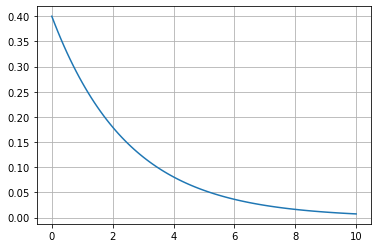

In [18]:
from scipy.stats import expon # 指数分布の確率分布を作成するのに用いる

x = np.linspace(0,10,101) 
plt.grid(True)
plt.plot(x, expon.pdf(x, scale=2.5)) # poisson.pdf(x, scale=平均値)

パラメータは1つだけで、平均値のみ。

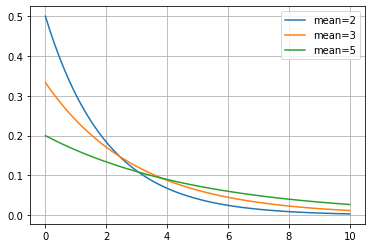

In [19]:
x = np.linspace(0,10,101) 
plt.grid(True)
for mu in [2,3,5]:
    plt.plot(x, expon.pdf(x, loc=0, scale=mu), label=f"mean={mu}")
    plt.legend()

In [20]:
# 平均1.5の指数分布に従う値を5つ生成
expon.rvs(scale=1.5, size=5)

array([0.20143025, 1.34839807, 0.73722582, 0.27129615, 0.23792066])

また、変数$y$が平均が$\frac{1}{\beta}$の指数分布に従うことを、以下のように書きます。
$$y \sim Exponential(\beta)$$

ちなみに、平均が$\frac{1}{\beta}$の指数分布を数式で書くと、以下のようになります。
$$\beta exp(-\beta x)$$

### (Optional)対数正規分布

値そのものではなく、値の対数が正規分布に従うような分布を、対数正規分布といいます。以下のような形をしています。  
株価やGDPの変化は対数分布にしたがっています。株価そのものの変化(+100円など)ではなく、変化率(+2%など)が正規分布に従っているからです。  
対数正規分布は、0以下にはなりません。また、左右非対称です。

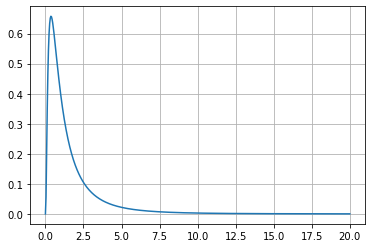

In [21]:
from scipy.stats import lognorm # 正規分布の確率分布を作成するのに用いる
import matplotlib.pyplot as plt

x = np.linspace(0,20,501) # 140から210まで、計101個の要素を等間隔にもつリスト(numpy.array)を作成
plt.grid(True)
plt.plot(x, lognorm.pdf(x, scale=np.exp(0), s=1)) 
# lognorm.pdf(x, scale=np.exp(対数を取ったときの平均), s=対数を取ったときの標準偏差)

パラメータは正規分布と同様、対数に直したときの平均$\mu$と、対数に直したときの標準偏差$\sigma$です。

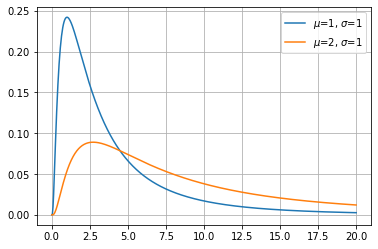

In [22]:
x = np.linspace(0,20,501) # -2から6まで、計101個の要素を等間隔にもつリスト(numpy.array)を作成
plt.grid(True)
for mu in [1,2]:
    plt.plot(x, lognorm.pdf(x, scale=np.exp(mu), s=1), label=f"$\mu$={mu}, $\sigma$=1")
    plt.legend()

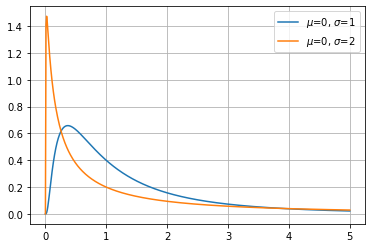

In [23]:
x = np.linspace(0,5,501) # -2から6まで、計101個の要素を等間隔にもつリスト(numpy.array)を作成
plt.grid(True)
for sigma in [1,2]:
    plt.plot(x, lognorm.pdf(x, scale=np.exp(0), s=sigma), label=f"$\mu$=0, $\sigma$={sigma}")
    plt.legend()

$$\frac{1}{\sqrt{2\pi}\sigma x}exp\left(-\frac{(ln(x)-\mu)^2}{2\sigma^2}\right)$$

### その他の分布

他には、二重指数分布、ベータ分布、ガンマ分布、二項分布、多変量正規分布、多項分布、ディリクレ分布、コーシー分布、スチューデントのt分布などがある。使いながら、少しずつ覚えていくと良い。

## 状態空間モデル: ローカルレベルモデル

次のような状況を想像する。  
Aさんはある川の水面の高さを毎年計測している。その川の高さは毎年上がったり下がったりしていて、その毎年の前年比変化幅はどうやらランダムっぽい。  
また、Aさんは適当なので、水面の高さの計測精度はそこまで高くない。計測結果(データ)には計測誤差が含まれている。  

t年の本当の川の水面の高さを$s_{t}$とすると、Aさんの計測データ$y_{t}$を使って、なんとか$s_{t}$を推測できないだろうか？

上のような状況では、ローカルレベルモデルが良く状況を表している。

$$s_{t} \sim N(s_{t-1}, \sigma_{v}^2) \\
y_{t} \sim N(s_{t}, \sigma_{w}^2)
$$

ここで、$\sigma_{v}$は毎年の本当の川の水面の高さの変化幅の標準偏差、$\sigma_{w}$はAさんの計測誤差の標準偏差である。

試しに、$s_{0}$から$s_{10}$まで、ローカルレベルモデルに従う系列を作ってみる。  
最初の年の水面の高さ$s_{0}$は10.2m, 水面の高さの変化幅の標準偏差$\sigma_{v}$は0.7m, Aさんの計測誤差の標準偏差$\sigma_{w}$は0.3mとする。

In [24]:
import numpy as np

np.zeros(3, dtype=np.float)

array([0., 0., 0.])

In [25]:


# np.random.seed(42) # 疑似乱数のシード値を固定
s = np.zeros(11, dtype=np.float) # 長さ11の0だけのベクトル 0,0,0,...,0
y = np.zeros(11, dtype=np.float)

s[0] = 10.2 # 初年度の
for i in range(1, 11): # i = 1,2,...,10
    s[i] = norm.rvs(loc = s[i-1], scale = 0.7) 

for i in range(0, 11): # i = 0,1,...,10
    y[i] = norm.rvs(loc = s[i], scale = 0.3)

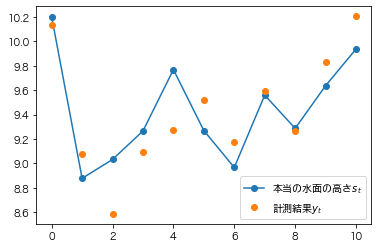

In [26]:
plt.rcParams['font.family'] = ".Aqua Kana"
plt.plot(s, "o-", label="本当の水面の高さ$s_{t}$")
plt.plot(y, "o", label="計測結果$y_{t}$")
plt.legend()

In [27]:
# 乱数を固定せずに、何度か系列を生成してみましょう

In [28]:
# 上では、y_tが平均s_t, 標準偏差0.3の正規分布に従うと仮定しましたが、
# y_tが平均s_tのポアソン分布に従っていた場合についても、y_tを生成してみましょう。
# (この場合、y_tは整数しか取らないので、もはや水面の高さでも何でもないですが、練習として...)
# ヒント: 平均10のポアソン分布の乱数は、例えば以下のように発生できます。
from scipy.stats import poisson
poisson.rvs(mu = 10)

10

In [29]:
# np.random.seed(42) # 疑似乱数のシード値を固定
s = np.zeros(11, dtype=np.float) # 長さ11の0だけのベクトル 0,0,0,...,0
y = np.zeros(11, dtype=np.float)

s[0] = 10.2 # 初年度の
for i in range(1, 11): # i = 1,2,...,10
    s[i] = norm.rvs(loc = s[i-1], scale = 0.7) 

for i in range(0, 11): # i = 0,1,...,10
    y[i] = poisson.rvs(mu = s[i])

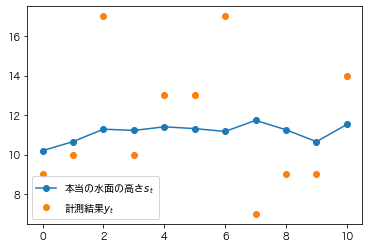

In [30]:
plt.rcParams['font.family'] = ".Aqua Kana"
plt.plot(s, "o-", label="本当の水面の高さ$s_{t}$")
plt.plot(y, "o", label="計測結果$y_{t}$")
plt.legend()

では、手元にAさんのデータ$y_{t}$があったとして、どのように$s_{t}$を推定すれば良いでしょうか。  
これは、パラメータ$s_{0}$, $s_{1}$, ..., $s_{10}$と、$\sigma_{v}$, $\sigma_{w}$、計13個のパラメータを推定する作業になります。  

方法はいくつかありますが、以下のように分類できます。

- 何でも使える
    - 一気に全部のパラメータを推定 : MCMC
    - 時点tごとにパラメータを推定: 粒子フィルタ
- 足し算だけ&分布は正規分布のみ
    - 時点tごとにパラメータを推定: カルマンフィルタ & 最尤推定
- 足し算だけ&分布はある程度色々扱える
    - 時点tごとにパラメータを推定: 非線形カルマンフィルタ & 最尤推定
        - いくつか種類があるが、どれも近似を使いながら、最後は通常のカルマンフィルタに持っていく。

現在はコンピュータの性能が上がったので、何でも使えるMCMCと粒子フィルタが使われる傾向にありますが、簡単なモデルであれば、高速なカルマンフィルタ&最尤推定が良く使われます。(statsmodelsのARMAモデルも、裏側ではカルマンフィルタ&最尤推定を使っています。)

次回では、パラメータ推定方法について、「要するに何をやっているのか？」の概要を紹介し、実際にパラメータ推定をやってみます。

## (Optional)小ネタ: フォント探し

日本語をmatplotlibで使用したいときは、それらに対応するフォントを探し、それを指定しなくてはならない。  
しかし、パソコンによって、インストールされているフォントは異なる。  
ここでは、日本語が使えるフォントを探し、設定する。

### 日本語

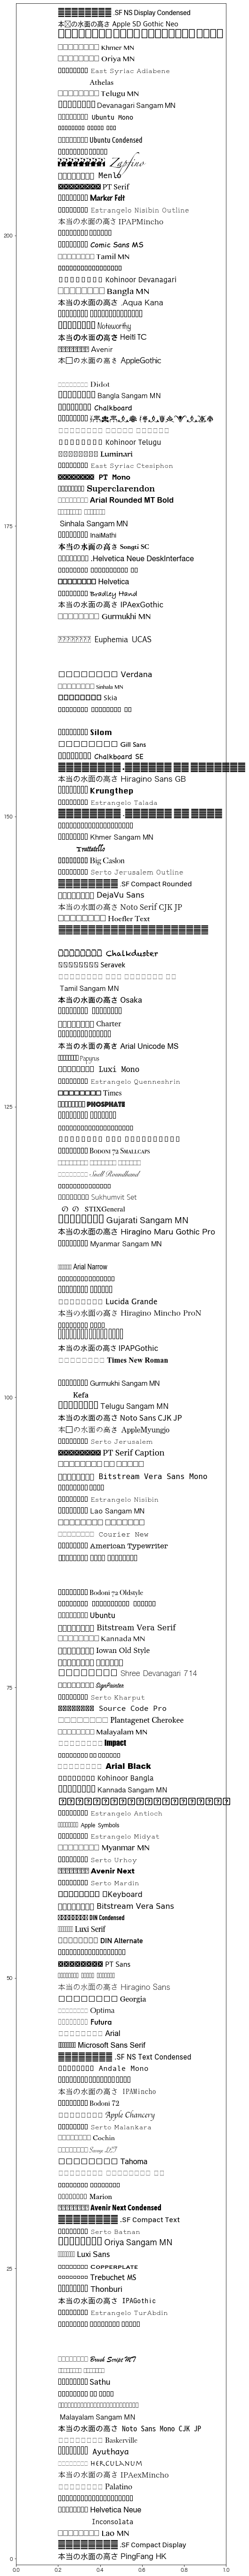

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # フォント管理のモジュール
import warnings # warningを消すのに使用

warnings.filterwarnings('ignore') # フォント周りで何故かwarningが出るので、邪魔なので消す

# 使用できるシステムフォントの一覧(fm.findSystemFonts)の各フォントについて、
# フォント名を取得し、font_listに追加する(何故かエラーが出るフォントがあるので、エラーについては無視する)
# エラー処理は、try: except:構文を使うことで、実装できる。
# try:以下の実行を試み、エラーが出た場合は、exceptの処理を行う。
font_list = []
for font in fm.findSystemFonts():
    try:
        font_list.append(fm.FontProperties(fname=font).get_name())
    except:
        pass

# フォント名一覧の重複を消す(セットに入れることで、重複がなくなる)
fonts = set(font_list)

fig = plt.figure(figsize=(8, 100))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim([-0.5, len(fonts)])

for i, f in enumerate(fonts):
    # フォントをx軸0.2, y軸がiの点に描画する。描画する文章は"本当の水面の高さ {フォント名}"
    # fontdictで使用するフォントとフォントサイズを指定
    ax.text(0.2, i,  '本当の水面の高さ {}'.format(f), fontdict={'family': f, 'fontsize': 16})

plt.show()

In [32]:
# ちなみに、try: except:構文は、tryの途中でエラーが出た場合、途中までの結果は取り消されない
a = 0
try:
    a = 1
    a = 1/0 # ZeroDIvisionError
except:
    print("これはエラー")
    raise # raiseでいつも通り、例外を表示する

これはエラー


ZeroDivisionError: division by zero

In [33]:
a

1

上記の実行結果から、このPCでは、"Noto Sans Mono CJK JP", "IPAMincho", "IPAGothic", "Heiti TC"などのフォントが使用できることがわかる。

### フォントの設定方法

#### notebook上で設定

matplotlibのフォントの設定は、以下のようにplt.rcParamsで"font.family"を指定すると、そのnotebookでは指定したフォントが使用される。(notebookを立ち上げ直した場合は、実行する必要がある)

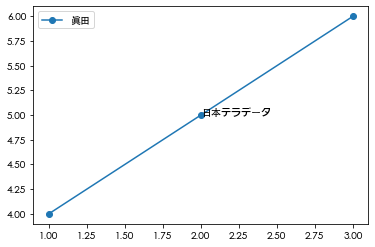

In [34]:
plt.rcParams["font.family"] = "Heiti TC"
plt.plot([1,2,3], [4,5,6], "o-", label="眞田")
plt.text(2, 5, "日本テラデータ")
plt.legend()

#### 設定ファイルで設定

※[こちら](https://qiita.com/maroKanatani/items/3b080c639395bba7795a)を参考にした。

~/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc ファイルを適当なエディタで開き、196行目前後の箇所を編集する

#font.family         : sans-serif
#font.style         : normal

上記のようにコメントアウトされた記述があるので、以下のような行を追加することで、フォントを指定する

#font.family         : sans-serif  
font.family         : Heiti TC  
#font.style         : normal

## 宿題

1. 以下の分布に従う乱数を、各々10個生成せよ
    - 平均0.2のポアソン分布
    - 平均7.2の指数分布
    - 平均0.5, 分散9の正規分布
    - p=0.7のベルヌイ分布
    - 範囲-1 ~ 1の一様分布
2. 以下の分布の確率密度関数または確率質量関数を描画せよ
    - 平均1.2のポアソン分布
    - 平均0.9の指数分布
    - 平均-4.5, 標準偏差2.3の正規分布
    - p = 0.43のベルヌイ分布
    - 範囲 3~4の一様分布
3. 平均70のポアソン分布は正規分布で近似できる。そのような正規分布を描画せよ。(なお、ポアソン分布の分散は平均と等しいという性質がある。すなわち、標準偏差は$\sqrt(平均)$である。
4. 前回のスキトラでは、ローカルレベルモデルに従う時系列を10点、シミュレートした。以下のような状態空間モデルに従う時系列を10点、シミュレートせよ。(実は演習の内容と同じだが、復習も兼ねて...)
$$s_{t} \sim N(s_{t-1}, \sigma_{v}^2) \\
y_{t} \sim Poisson(s_{t})$$
ただし、$s_{0}$は10.2, $\sigma_{v}$は0.7とする。
5. (応用)以下のような状態空間モデルに従う時系列を10点、シミュレートせよ。なお、以下のようなモデルは、**ローカル線形トレンドモデル**と呼ばれる。$d_{t}$が時点$t$のトレンドを意味している。
$$s_{t} \sim N(s_{t-1} + d_{t-1}, \sigma_{v}^2) \\
d_{t} \sim N(d_{t-1}, \sigma_{a}^2) \\
y_{t} \sim N(s_{t}, \sigma_{w}^2)$$
ただし、$s_{0}$は100, $\sigma_{v}$は3、$\sigma_{w}$は10、$d_{0}$は0, $\sigma_{a}$は1.5とする。意味合いとしては、例えば、毎分、気球の高度をAさんが地上から計測しているとして、Aさんの計測結果が$y_{t}$(m)、気球の真の高度が$s_{t}$(m)、気球が風に流されてフラフラ浮き沈みするとして、その標準偏差が$\sigma_{v}$(3m)、気球の目標上昇速度が$d_{t}$(m/分)、気球の目標上昇速度も変化するとして、その標準偏差が$d_{t}$(1.5m/分)、Aさんが気球を地上から観測して、計測するときの測定誤差が$\sigma_{w}$(10m)である。
6. (応用)以下のような状態空間モデルに従う時系列を10点、シミュレートせよ。
$$s_{t} \sim N(s_{t-1}, \sigma_{v}^2) \\
p_{t} \sim N(p_{t-1}, \sigma_{a}^2) \\
y_{t} \sim Poisson(s_{t} \cdot p_{t})$$
ただし、$s_{0}$は1000, $p_{0}$は0.03, $\sigma_{v}$は20、$\sigma_{a}$は0.001とする。